In [1]:
import numpy as np


In [11]:
def Polinomio_Newton(x, xc, f):
    n = len(xc)

    # Obtendo operadores de diferença
    opn = np.zeros([n, n])
    opn[0] = f
    
    # Obtendo Operadores de diferença dividida ordem 1
    for k in range(0, n-1):
        opn[1][k] = ((f[k]-f[k+1])/(xc[k]-xc[k+1]))

    # Obtendo matriz de operadores até a ordem n:
    for i in range(2, n):
        for k in range(0, n-i):
            opn[i][k] = (opn[i-1][k+1]-opn[i-1][k])/(xc[k+i]-xc[k])
    # Cada linha é uma lista de operadores de ordem correspondente a da linha

    # Resolvendo o polinômio com determinado valor x:

    Pn = f[0]
    prodx = (x-xc[0])
    for i in range(1, n):
        Pn += prodx*opn[i][0]
        prodx *= (x-xc[i])

    return Pn



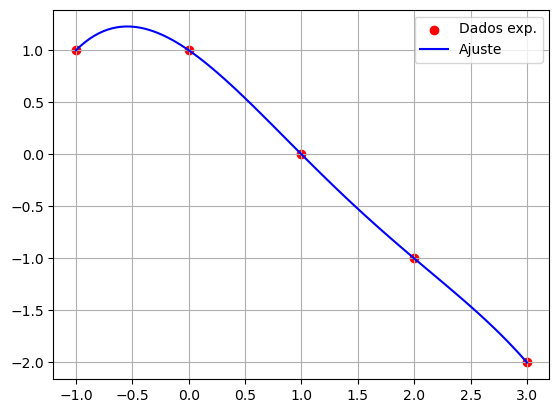

In [13]:
x = [-1.0, 0.0, 1.0, 2.0, 3.0]
f = [1.0, 1.0, 0.0, -1.0, -2.0]

import matplotlib.pyplot as plt

xm = np.linspace(x[0], x[-1], 100) ## cria uma "malha fina" de 100 pontos do primeiro x ao último

fi = []

for i in range(0, len(xm)):
    fi.append(Polinomio_Newton(xm[i], x, f)) 


plt.scatter(x, f, color='red', label='Dados exp.')
plt.plot(xm, fi, color='blue', label='Ajuste')
plt.legend()
plt.grid()
plt.show()